<a href="https://colab.research.google.com/github/syeong1218/ysyy/blob/master/ch_4_3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4.3 수치미분

## 4.3.1 미분

* 미분 : 한순간의 변화량
$$ \frac{\mathrm{d} f(x)}{\mathrm{d} x}=\lim_{h\rightarrow 0}\frac{f(x+h)-f(x)}{h} $$

* 나쁜 구현의 예 

In [0]:
def numerical_diff(f,x):
  h=10e-50
  return (f(x+h)-f(x))/h

    이 코드는 아래와 같은 반올림 오차 문제를 일으킨다.

In [0]:
import numpy as np
np.float32(1e-50)

0.0

    또한, 진정한 미분은 x위치의 함수의 기울기이지만, 이 코드에서의 미분은 (x+h)와 x사이의 기울기에 해당한다. 따라서 h를 무한히 0으로 좁히는 것이 불가능하다.
    
* 두가지 문제점을 개선한 수치 미분

In [0]:
def numerical_diff(f,x):
  h=1e-4
  return (f(x+h)-f(x-h))/(2*h)

## 4.3.2 수치 미분의 예

$$ y=0.01x^{2}+0.1x$$

In [0]:
def function_1(x):
  return 0.01*x**2+0.1*x

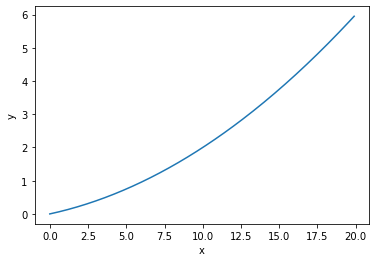

In [0]:
import numpy as np
import matplotlib.pyplot as plt

x= np.arange(0.0, 20.0, 0.1)
y=function_1(x)
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x,y)
plt.show()

    x=5일 때와 10일 때 미분

In [0]:
numerical_diff(function_1, 5)

0.1999999999990898

In [0]:
numerical_diff(function_1 ,10)

0.2999999999986347

## 4.3.3 편미분

$$ f(x_{0},x_{1})=x_{0}^{2}+x_{1}^{2} $$

In [0]:
def function_2(x):
  return x[0]**2+x[1]**2

* 편미분 : 변수가 여러개인 함수에 대한 미분

    -> 문제1 : x0=3, x1=4일 때, x0에 대한 편미분을 구하라.

In [0]:
def function_tmp1(x0):
  return x0*x0 +4.0**2.0

numerical_diff(function_tmp1, 3.0)

6.00000000000378

      -> 문제2 : x0=3, x1=4일 때, x1에 대한 편미분을 구하라.

In [0]:
def function_tmp2(x1):
  return 3.0**2.0 +x1*x1

numerical_diff(function_tmp2, 4.0)

7.999999999999119

# 4.4 기울기

기울기 : 모든 변수의 편미분을 벡터로 정리한 것

In [0]:
import numpy as  np
def numerical_gradient(f,x):
  h=1e-4
  grad = np.zeros_like(x)
  
  for idx in range(x.size):
    tmp_val = x[idx]
    x[idx] = tmp_val +h
    fxh1 = f(x)
    
    x[idx] = tmp_val - h
    fxh2 = f(x)
    
    grad[idx] = (fxh1 - fxh2) / (2*h)
    x[idx] = tmp_val
    
  return grad

In [0]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [0]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([0., 4.])

In [0]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([6., 0.])

No handles with labels found to put in legend.


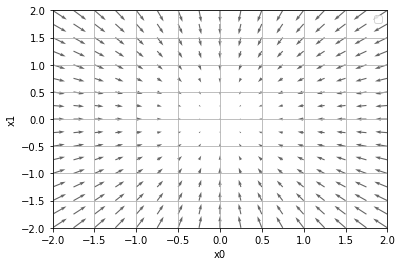

In [0]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, x):
    h = 1e-4 
    grad = np.zeros_like(x) 
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()
    
    grad = numerical_gradient(function_2, np.array([X, Y]) )
    
plt.figure()
plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()
plt.legend()
plt.draw()
plt.show()

기울기는 각 지점에서 낮아지는 뱡향을 가리킨다. 따라서 기울기가 가리키는 쪽은 각 장소에서 함수의 출력 값을 가장 크게 줄이는 방향이다.

## 4.4.1 경사법(경사 하강법)

기계학습 문제은 학습단계에서 최적의 매개변수를 찾는다.

여기서 최적이란 손실 함수가 최솟값이 될 때의 매개변수 값이다.

* 경사법 : 기울기를 잘 이용해 함수의 최솟값을 찾는 법, 현 위치에서 기울어진 방향으로 일정 거리만큼 이동한 다음 그곳에서의 기울기를 구하고, 또 그 기울어진 방향으로 이동을 반복하여 함수의 값을 점차 줄이는 것.

  * 주의할 점 - 각 지점에서 함수의 값을 낮추는 방안을 제시하는 지표가 기울기라는 점
       
  * 경사 하강법 - 경사법으로 최솟값을 찾을 때
  
  * 경사 상승법 - 경사법으로 최댓값을 찾을 때
  
  $$ x_{0} = x_{0}-\eta \frac{\partial f }{\partial x_{0}}$$
  $$x_{1} = x_{1}-\eta \frac{\partial f }{\partial x_{1}} $$
  
  $$\eta=학습률$$


In [0]:
def gradient_descent(f, init_x, lr=0.01, step_num=100): #f= 최적화하려는 함수, init_x = 초기값, lr = 학습률, step_num = 경사법에 따른 반복 횟수
  x = init_x
  
  for i in range(step_num):
    grad = numerical_gradient(f,x)
    x-=lr*grad
  return x

$$ 문제 : f(x_{0},x_{1})=x_{0}^{2}+x_{1}^{2}의 최솟값을 구하라.$$

In [0]:
def function_2(x):
  return x[0]**2+x[1]**2

init_x=np.array([-3.0,4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1,step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

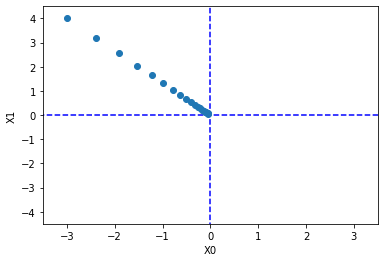

In [0]:
import numpy as np
import matplotlib.pylab as plt


def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

In [0]:
# 학습률이 너무 큰 예 : lr=10.0
init_x = np.array([-3.0,4.0])
gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100)

(array([-2.58983747e+13, -1.29524862e+12]),
 array([[-3.00000000e+00,  4.00000000e+00],
        [ 5.70000000e+01, -7.60000000e+01],
        [-1.08300000e+03,  1.44400000e+03],
        [ 2.05770000e+04, -2.74360000e+04],
        [-3.90963008e+05,  5.21284002e+05],
        [ 7.42829664e+06, -9.90439654e+06],
        [-1.41137328e+08,  1.88183103e+08],
        [ 2.68126267e+09, -3.57501690e+09],
        [-5.09763373e+10,  6.79001831e+10],
        [ 9.45170863e+11, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.295

In [0]:
# 학습률이 너무 작은 예 : lr=1e-10
init_x = np.array([-3.0,4.0])
gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)

(array([-2.99999994,  3.99999992]), array([[-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  3.99999999],
        [-3.        ,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999998,  3.99999998],
        [-2.99999998,  3.9999

## 4.4.2 신경망에서의 기울기

$$ W=가중치, L=손실함수$$

$$W=\binom{w_{11} w_{12} w_{13}}{w_{21}w_{22}w_{23}}$$

$$ \frac{\partial L}{\partial W}=\binom{\frac{\partial L}{\partial w_{11}}\frac{\partial L}{\partial w_{12}}\frac{\partial L}{\partial w_{13}}}{\frac{\partial L}{\partial w_{21}}\frac{\partial L}{\partial w_{22}}\frac{\partial L}{\partial w_{23}}}$$

In [0]:
import sys, os
sys.path.append(os.pardir)  
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient


class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) 

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

In [0]:
net = simpleNet()
print(net.W)

[[ 0.22555442  0.19171414 -0.30336937]
 [-0.65497285  1.01489547  0.26507874]]


In [0]:
x = np.array([0.6, 0.9])
p=net.predict(x)
print(p)

[-0.45414291  1.0284344   0.05654924]


In [0]:
np.argmax(p)

1

In [0]:
t = np.array([0, 0, 1])
net.loss(x,t)

1.445270654415886

In [0]:
def f(W):
    return net.loss(x,t)

dW=numerical_gradient(f,net.W)
print(dW)

[[ 0.03223067  0.36422563 -0.39645629]
 [ 0.048346    0.54633844 -0.59468444]]


새로운 함수를 정의할 때 def 말고 lambda를 이용할수도 있다.

In [0]:
f=lambda w:net.loss(x,t)
dW=numerical_gradient(f,net.W)

# 4.5 학습 알고리즘 구현하기

* 신경망 학습의 절차
  1. 미니배치 : 훈련 데이터 중 일부를 무작위로 가져온다.
  2. 기울기 산출 : 미니배치의 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구한다.
  3. 매개변수 갱신 : 가중치 매개변수를 기울기 방향으로 아주 조금 갱신한다.
  4. 반복
  
* 확률적 경사 하강법(SGD) : 데이터를 미니배치로 선정하여 경사 하강법으로 매개변수를 갱신하는 방법

## 4.5.1 2층 신경망 클래스 구현하기

In [0]:
import sys, os
sys.path.append(os.pardir)  
from common.functions import * # * : function에 있는 모든 함수
from common.gradient import numerical_gradient


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
    

In [0]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
net.params['W1'].shape

(784, 100)

In [0]:
net.params['b1'].shape

(100,)

In [0]:
net.params['W2'].shape

(100, 10)

In [0]:
net.params['b2'].shape

(10,)

In [0]:
x=np.random.rand(100,784)
y=net.predict(x)

In [0]:
x=np.random.rand(100,784)
t=np.random.rand(100,10)

grads = net.numerical_gradient(x,t)

In [0]:
grads['W1'].shape

(784, 100)

In [0]:
grads['b1'].shape

(100,)

In [0]:
grads['W2'].shape

(100, 10)

In [0]:
grads['b2'].shape

(10,)

## 4.5.2 미니배치 학습 구현하기

In [0]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True) #normlize : 0에서 1사이 오게 할려고 

train_loss_list = []

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
        
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

## 4.5.3 시험 데이터로 평가하기



In [0]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc)) #str : 숫자를 문자열로

train acc, test acc | 0.09736666666666667, 0.0982
train acc, test acc | 0.7915, 0.7945
train acc, test acc | 0.87705, 0.8814
train acc, test acc | 0.8992333333333333, 0.9012
train acc, test acc | 0.9090666666666667, 0.9086
train acc, test acc | 0.9144166666666667, 0.9176
train acc, test acc | 0.9194, 0.9221
train acc, test acc | 0.92365, 0.925
train acc, test acc | 0.92725, 0.9289
train acc, test acc | 0.9297333333333333, 0.9296
train acc, test acc | 0.9334666666666667, 0.9334
train acc, test acc | 0.93655, 0.9362
train acc, test acc | 0.93915, 0.9389
train acc, test acc | 0.9412666666666667, 0.9406
train acc, test acc | 0.9433, 0.9424
train acc, test acc | 0.9454833333333333, 0.9438
train acc, test acc | 0.94705, 0.9464


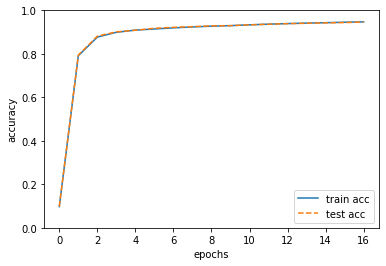

In [0]:
# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

훈련 데이터에 대한 정확도를 실선으로, 시험 데이터에 대한 정확도를 점선으로 그렸다. 학습이 진행될수록 훈련 데이터와 시험데이터를 사용한 정확도가 모두 좋아지는 경향을 보이고, 두 선이 겹치는 모습을 보아 차이가 없음을 알 수 있다. 따라서 이 학습은 오버피팅이 일어나지 않았다.